# Vikas Bhardwaj
Task:3 
To Explore K-Mean Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv("C:\\Users\\91701\\Desktop\\assingments\\iris.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
dataset.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [5]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data_cp=dataset.copy()

In [7]:
data_cp

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_cp['species']=le.fit_transform(data_cp['species'])
data_cp['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [9]:
dataset.drop("species",axis=1,inplace=True)

In [10]:
dataset_values=data_cp.iloc[:,0:4].values

In [11]:
dataset

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Petal Length Vs Petal width

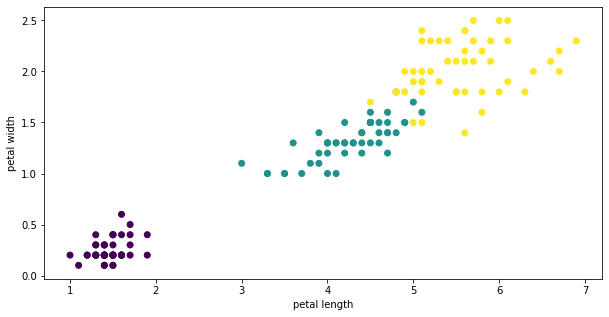

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(data_cp['petal_length'],data_cp["petal_width"],c=data_cp["species"].values)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

# Sepal Length Vs Sepal width¶

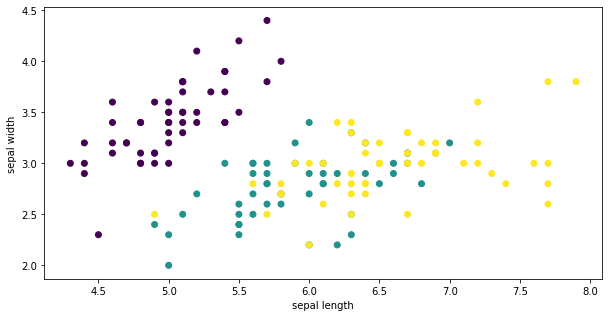

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(data_cp['sepal_length'],data_cp["sepal_width"],c=data_cp["species"].values)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

# Find SSE

In [14]:
from sklearn.cluster import KMeans
sse = []
k_rng=range(1,10)
for i in k_rng:
    km=KMeans(n_clusters=i,random_state=42)
    km.fit(dataset)
    sse.append(km.inertia_)
sse    


[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.40900974025974,
 30.063110617452725,
 27.98222120518688]

# No. of cluster using Elbow Method

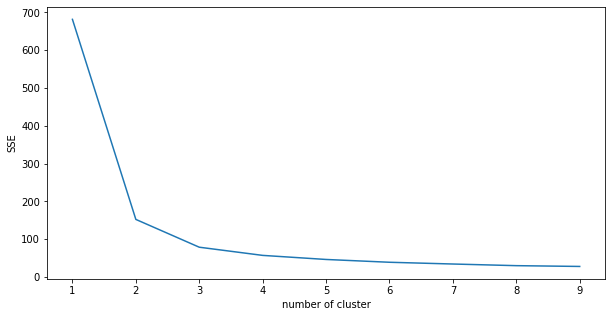

In [15]:
plt.figure(figsize=(10,5))
plt.plot(k_rng,sse)
plt.xlabel("number of cluster")
plt.ylabel("SSE")
plt.show()

In [16]:
k=3
km=KMeans(n_clusters=k)
y_kmeans=km.fit_predict(dataset)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [17]:
dataset["cluster"]=y_kmeans
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [18]:
df1=dataset[dataset.cluster==0]
df2=dataset[dataset.cluster==1]
df3=dataset[dataset.cluster==2]

# Visualizing Clusters

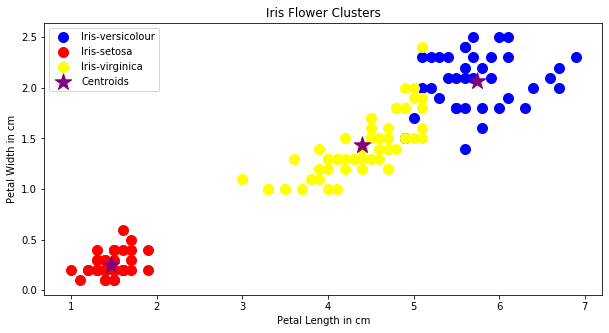

In [19]:
plt.figure(figsize=(10,5))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(dataset_values[y_kmeans == 0, 2], dataset_values[y_kmeans == 0, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(dataset_values[y_kmeans == 1, 2], dataset_values[y_kmeans == 1, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(dataset_values[y_kmeans == 2, 2], dataset_values[y_kmeans == 2, 3],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], s = 300, c = 'purple',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()
plt.show()

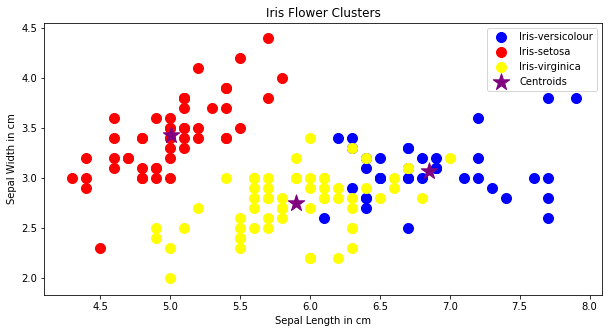

In [20]:
plt.figure(figsize=(10,5))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(dataset_values[y_kmeans == 0, 0], dataset_values[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(dataset_values[y_kmeans == 1, 0], dataset_values[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(dataset_values[y_kmeans == 2, 0], dataset_values[y_kmeans == 2, 1],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 300, c = 'purple',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Sepal Width in cm')
plt.xlabel('Sepal Length in cm')
plt.legend()
plt.show()